# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=600)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['ilulissat',
 'mahebourg',
 'kaitangata',
 'los llanos de aridane',
 'kavieng',
 'cherskiy',
 'port alfred',
 'saint-philippe',
 'tsihombe',
 'norman wells',
 'georgetown',
 'new norfolk',
 'atuona',
 'jaca',
 'nyurba',
 'ushuaia',
 'nikolskoye',
 'albany',
 'sorland',
 'port keats',
 'husavik',
 'louisbourg',
 'ibi',
 'ndiekro',
 'ahipara',
 'punta arenas',
 'newport',
 'kutoarjo',
 'hermanus',
 'dianopolis',
 'hobart',
 'butaritari',
 'halalo',
 'ponta do sol',
 'mataura',
 'puerto ayora',
 'barrow',
 'bar harbor',
 'hami',
 'beloha',
 'vaini',
 'victoria',
 'kapaa',
 'zamhlay',
 'rikitea',
 'albemarle',
 'minas',
 'bredasdorp',
 'dzhusaly',
 'upernavik',
 'cidreira',
 'petropavlovsk-kamchatskiy',
 'busselton',
 'bambous virieux',
 'provideniya',
 'coahuayana',
 'airai',
 'taolanaro',
 'coihaique',
 'gat',
 'barentsburg',
 'pevek',
 'bethanien',
 'palmer',
 'kahului',
 'grand river south east',
 'geraldton',
 'yellowknife',
 'nizhneyansk',
 'riyadh',
 'asfi',
 'khatanga',
 'sredneko

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""     
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""
weather_df["Date"] = "" 


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + '&units='+ units + "&q=" + city 
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = weather_response["dt"]
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = weather_response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
       
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("----------------------------")        
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | ilulissat.
Processing Record 1  of Set 1 | mahebourg.
Processing Record 2  of Set 1 | kaitangata.
Processing Record 3  of Set 1 | los llanos de aridane.
Processing Record 4  of Set 1 | kavieng.
Processing Record 5  of Set 1 | cherskiy.
Processing Record 6  of Set 1 | port alfred.
Processing Record 7  of Set 1 | saint-philippe.
Processing Record 8  of Set 1 | tsihombe.
City not found...skipping tsihombe.
Processing Record 9  of Set 1 | norman wells.
Processing Record 10  of Set 1 | georgetown.
Processing Record 11  of Set 1 | new norfolk.
Processing Record 12  of Set 1 | atuona.
Processing Record 13  of Set 1 | jaca.
Processing Record 14  of Set 1 | nyurba.
Processing Record 15  of Set 1 | ushuaia.
Processing Record 16  of Set 1 | nikolskoye.
Processing Record 17  of Set 1 | albany.
Processing Record 18  of Set 1 | sorland.
Processing Record 19  of Set 1 | port keats.
Processing Record 20  of Set 1 | 

In [10]:
weather_df.dtypes

City                object
Country             object
Latitude            object
Longitude           object
Cloudiness (%)      object
Humidity (%)        object
Max Temp (F)        object
Wind Speed (mph)    object
Date                object
dtype: object

In [14]:
# Convert data strings to float
weather_df["Cloudiness (%)"] = pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
weather_df["Humidity (%)"] = pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
weather_df["Latitude"] = pd.to_numeric(weather_df["Latitude"]).astype(float)
weather_df["Longitude"] = pd.to_numeric(weather_df["Longitude"]).astype(float)
weather_df["Max Temp (F)"] = pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
weather_df["Wind Speed (mph)"] = pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Save Output File to csv

weather_df.to_csv("cities.csv")

weather_df.head()

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
0,ilulissat,GL,69.2167,-51.1000,100.0,93.0,30.22,0.00,1.664596e+09
1,mahebourg,MU,-20.4081,57.7000,75.0,68.0,70.09,12.66,1.664596e+09
2,kaitangata,NZ,-46.2817,169.8464,0.0,59.0,48.33,5.50,1.664596e+09
3,los llanos de aridane,ES,28.6585,-17.9182,100.0,84.0,65.95,10.36,1.664596e+09
4,kavieng,PG,-2.5744,150.7967,73.0,73.0,82.98,13.53,1.664596e+09


In [16]:
weather_df.describe()

,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date
count,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,2.890000e+02
mean,18.124895,16.900913,52.806228,72.975779,62.105882,7.699135,1.664596e+09
std,35.079255,95.402179,40.632719,18.144753,17.354751,5.416174,6.924974e+01
min,-54.800000,-175.200000,0.000000,15.000000,13.710000,0.000000,1.664596e+09
25%,-13.394700,-69.363200,8.000000,64.000000,49.230000,3.440000,1.664596e+09
50%,21.461200,19.962000,57.000000,76.000000,63.680000,6.710000,1.664596e+09
75%,46.415400,104.710400,99.000000,87.000000,77.630000,10.760000,1.664596e+09
max,78.218600,178.416700,100.000000,100.000000,91.710000,29.930000,1.664596e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
humidity_df = weather_df.loc[(weather_df["Humidity (%)"] > 100)]
humidity_df.head()

,City,Country,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph),Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

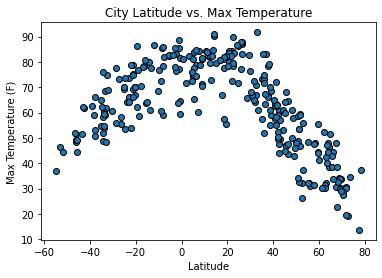

In [21]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp (F)"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

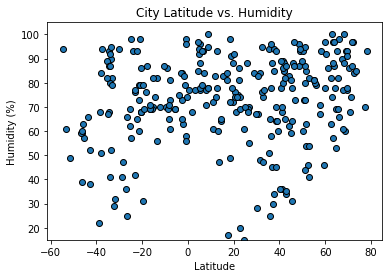

In [22]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity (%)"],edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

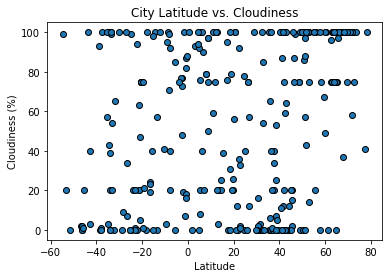

In [23]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness (%)"],edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

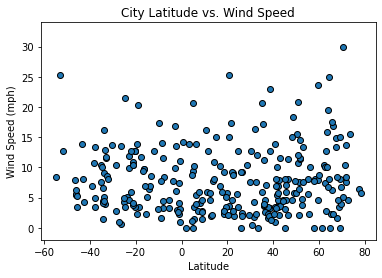

In [24]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (mph)"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [26]:
# Nothern and Souther Hemisphere dataframes

northern_hemisphere_df = weather_df.loc[(weather_df['Latitude'] >= 0) & (weather_df['Longitude'] >= 0)]

southern_hemisphere_df = weather_df.loc[(weather_df['Latitude'] <= 0) & (weather_df['Longitude'] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7494867469417897
-------------------------------------
The distribution of Max Temperature for both hemispheres are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere.


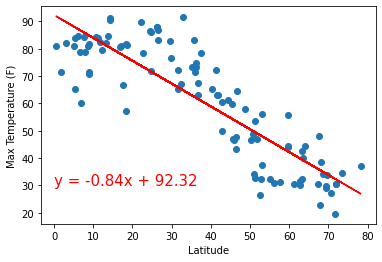

In [28]:
n_latitude = northern_hemisphere_df['Latitude']
n_max_temp = northern_hemisphere_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_max_temp)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(n_latitude, n_max_temp)

print(f"The r-value is: {rvalue**2}")
print("-------------------------------------")
print("The distribution of Max Temperature for both hemispheres are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator.  Temperature seem to be more frequent in the nothern hemisphere.")
plt.savefig("fig5.png") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6755246509000202
-------------------------------------
The distribution of Max Temperature for both hemispheres are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator. 


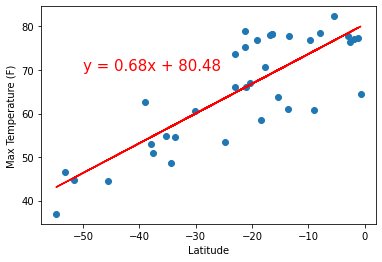

In [30]:
s_latitude = southern_hemisphere_df['Latitude']
s_max_temp = southern_hemisphere_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_max_temp)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(s_latitude, s_max_temp)

print(f"The r-value is: {rvalue**2}")
print("-------------------------------------")
print("The distribution of Max Temperature for both hemispheres are very similar due to the fact that the highest temperatures recorded closest to the equator and coldest furthest from the equator. ")
plt.savefig("fig6.png") 
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.010550915946543345
-------------------------------------
Based on the linear regression of both hemispheres the increase in latitude follows with an increase in humidity. 


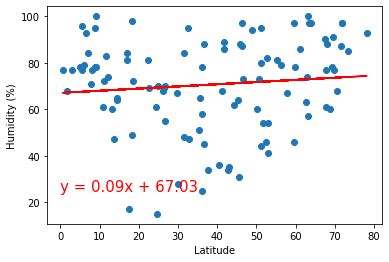

In [33]:
n_humidity = northern_hemisphere_df['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_humidity)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(n_latitude, n_humidity)

print(f"The r-value is: {rvalue**2}")
print("-------------------------------------")
print(f"Based on the linear regression of both hemispheres the increase in latitude follows with an increase in humidity. ")
plt.savefig("fig7.png") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01920023676116791
-------------------------------------
Based on the linear regression of both hemispheres the increase in latitude follows with an increase in humidity.


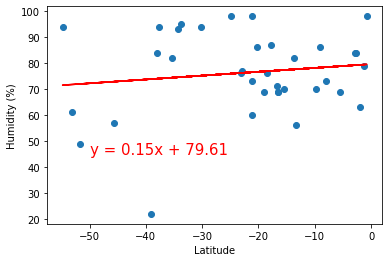

In [34]:
s_humidity = southern_hemisphere_df['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_humidity)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(s_latitude, s_humidity)

print(f"The r-value is: {rvalue**2}")
print("-------------------------------------")
print(f"Based on the linear regression of both hemispheres the increase in latitude follows with an increase in humidity.")
plt.savefig("fig8.png") 
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10315967925678932


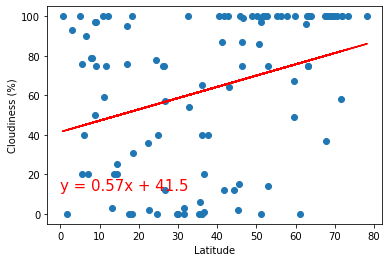

In [36]:
n_clouds = northern_hemisphere_df['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_clouds)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(n_latitude, n_clouds)

print(f"The r-value is: {rvalue**2}")

plt.savefig("fig9.png") 
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.010653742026152836


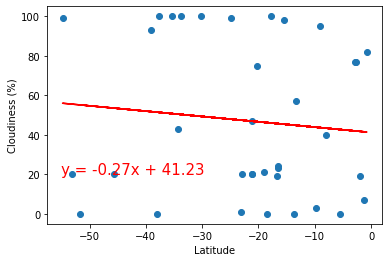

In [37]:
s_clouds = southern_hemisphere_df['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_clouds)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(s_latitude, s_clouds)

print(f"The r-value is: {rvalue**2}")
plt.savefig("fig10.png") 
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01743488983386438


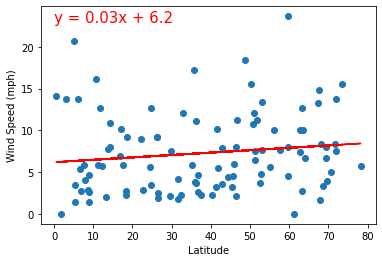

In [38]:
n_wind = northern_hemisphere_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitude, n_wind)
regress_values = n_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(n_latitude,regress_values,"r-") 
plt.annotate(line_eq,(0,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(n_latitude, n_wind)

print(f"The r-value is: {rvalue**2}")
plt.savefig("fig11.png") 
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03403761092257093


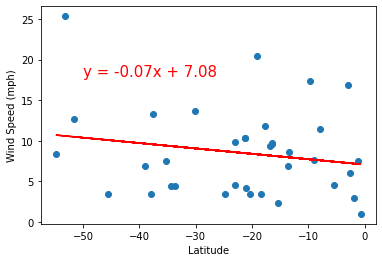

In [39]:
s_wind = southern_hemisphere_df['Wind Speed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitude, s_wind)
regress_values = s_latitude * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(s_latitude,regress_values,"r-") 
plt.annotate(line_eq,(-50,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(s_latitude, s_wind)

print(f"The r-value is: {rvalue**2}")
plt.savefig("fig12.png") 
plt.show()